In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aungh\AppData\Local\Temp\ipykernel_13996\665020467.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')


Most Popular Condom Type

C:\Users\aungh\AppData\Local\Temp\ipykernel_13996\361751080.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=df_condom_type, x='Most Popular Condom Type', y='count', hue='count', palette=custom_palette)


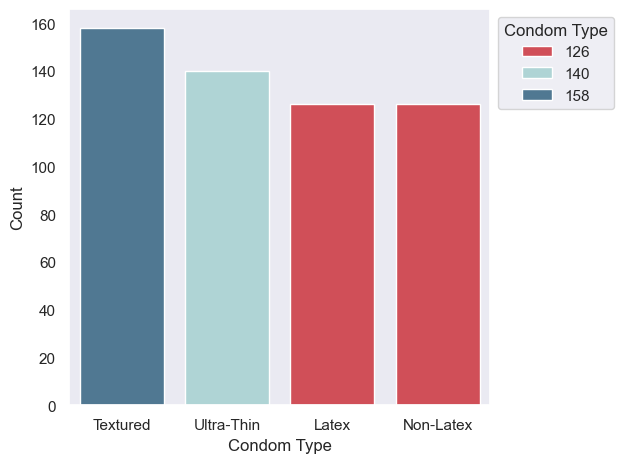

In [164]:
df_condom_type = df['Most Popular Condom Type'].value_counts().reset_index()
custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
df_condom_type
sns.set_theme(style='dark')
sns.barplot(data=df_condom_type, x='Most Popular Condom Type', y='count', hue='count', palette=custom_palette)
plt.legend(title='Condom Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Condom Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Sex Education Programs around the world about Safe Sex

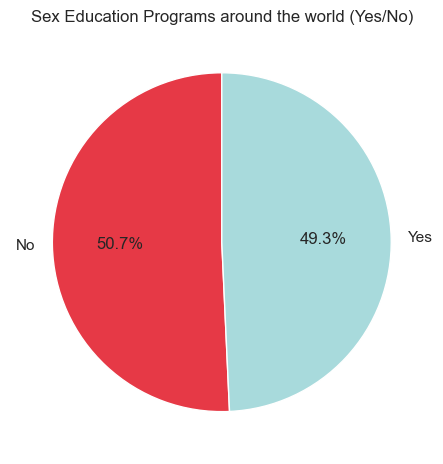

In [165]:
sex_education = df['Sex Education Programs (Yes/No)'].value_counts()
sns.set_theme(style='dark')
sex_education.plot(kind='pie', autopct='%1.1f%%', labels=sex_education.index, legend=False,startangle=90,colors=custom_palette)
plt.title('Sex Education Programs around the world (Yes/No)')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

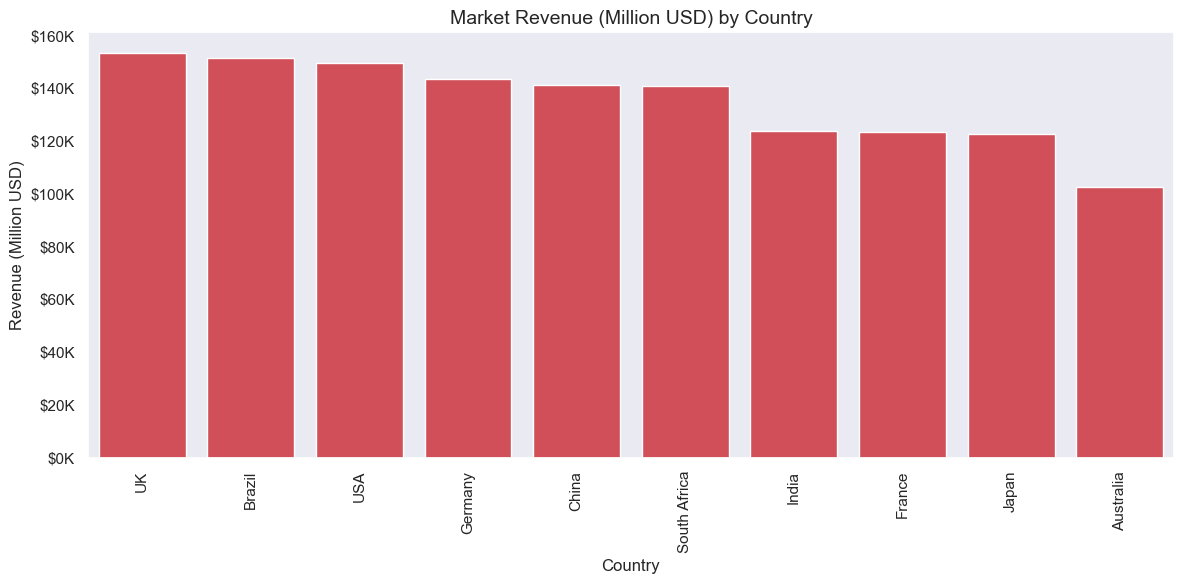

In [166]:
df_condom_sales_around_the_world = (df.groupby('Country')['Market Revenue (Million USD)']
                                    .sum()
                                    .reset_index()
                                    .sort_values(by='Market Revenue (Million USD)',ascending=False))

df_condom_sales_around_the_world 
sns.set_theme(style='dark')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_condom_sales_around_the_world,x='Country',y='Market Revenue (Million USD)',color='#E63946')
plt.title('Market Revenue (Million USD) by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue (Million USD)', fontsize=12)
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()


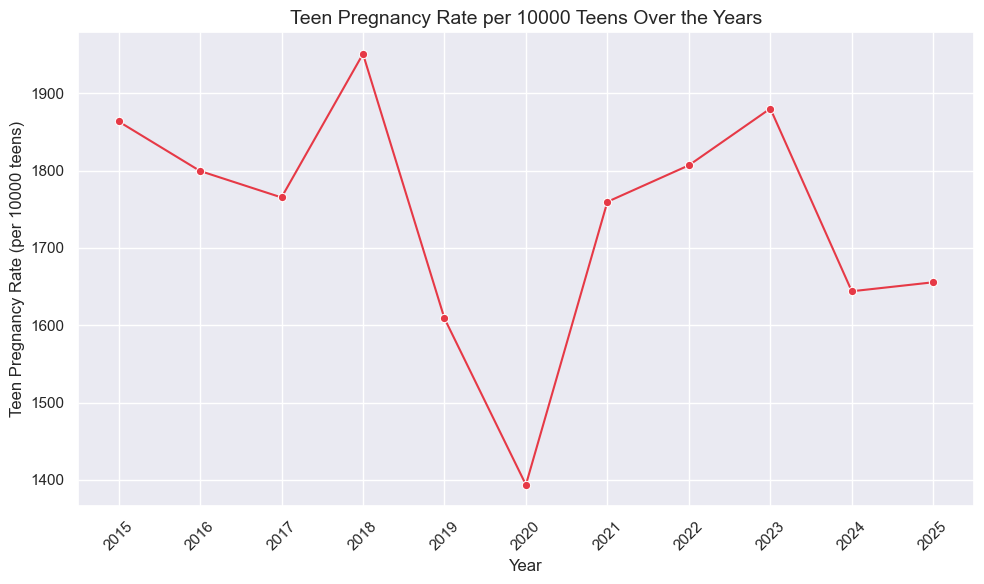

In [167]:
Pregnancy_Rate = df.groupby('Year')['Teen Pregnancy Rate (per 10000 teens)'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
sns.lineplot(data=Pregnancy_Rate, x='Year', y='Teen Pregnancy Rate (per 10000 teens)', marker='o',color='#E63946')
plt.xticks(Pregnancy_Rate['Year'], rotation=45)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Teen Pregnancy Rate (per 10000 teens)', fontsize=12)
plt.title('Teen Pregnancy Rate per 10000 Teens Over the Years', fontsize=14)
plt.tight_layout()
plt.show()

In [168]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 10000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Brand Dominance,Sex Education Programs (Yes/No),Male Purchases (%),Female Purchases (%)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,Kamasutra,No,69,39
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,Skyn,No,50,33
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,Skyn,Yes,46,54
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,Manforce,No,49,57
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,Trojan,Yes,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,LifeStyles,Yes,52,60
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,LifeStyles,No,62,41
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,Durex,Yes,45,59
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,Skyn,Yes,72,31


In [169]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

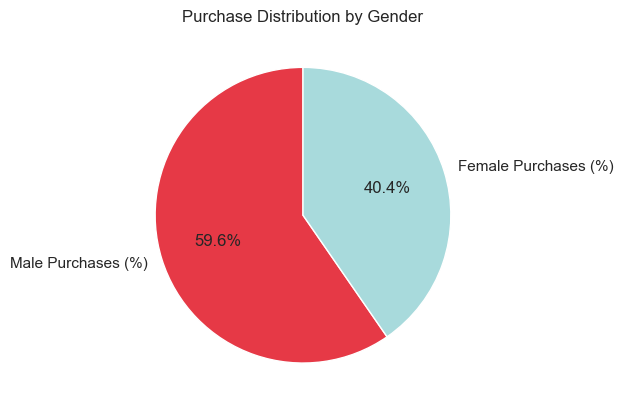

In [172]:
purchase_data = df[['Male Purchases (%)', 'Female Purchases (%)']].sum()

sns.set_theme(style='dark')
purchase_data.plot(kind='pie', autopct='%1.1f%%', labels=purchase_data.index, legend=False, startangle=90, colors=custom_palette)

plt.title('Purchase Distribution by Gender')
plt.ylabel('')  # Remove the y-label for a cleaner pie chart
plt.show()


In [173]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')